### OOP example using Banking system

Implement the following objects. You have the freedom to implement your desired behaviors of the methods as long as the behaviors match the name of the method.

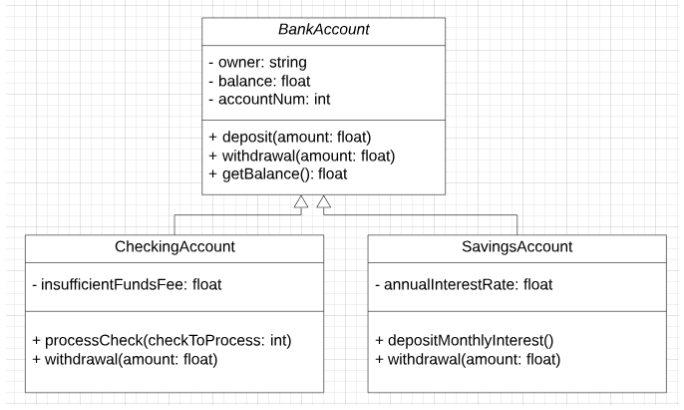

Why use OOP?
Here we will use class to group attributes and function/methods of different bank account.


**Encapsulation**: Private and protected attributes so that we can protect account details and ensures controlled access

**Inheritance**: By reusing  BankAccount code, we can create CheckingAccount and SavingsAccount via inheriting from BankAccount

**Polymorphism**: Both subclasses use the withdrawal() method but it behaves differently depending on the account

**Scalability**: OOP allows us to easily add new account types (e.g., BusinessAccount) or features

In [1]:
class BankAccount:
  '''Set up the object BankAccount
  '''
    def __init__(self, owner, balance, accountNum):
        self._owner = owner  # protected
        self._balance = balance  # protected
        self._accountNum = accountNum  # protected

    def deposit(self, amount):
        if amount > 0:
            self._balance += amount
            print(f"{amount} deposited. New balance: {self._balance}")
        else:
            print("Deposit amount must be positive.")

    def withdrawal(self, amount):
        if amount > 0 and amount <= self._balance:
            self._balance -= amount
            print(f"{amount} withdrawn. New balance: {self._balance}")
        else:
            print("Insufficient balance or invalid amount.")

    def getBalance(self):
        return self._balance


class CheckingAccount(BankAccount):
    def __init__(self, owner, balance, accountNum, insufficientFundsFee):
        super().__init__(owner, balance, accountNum)
        self._insufficientFundsFee = insufficientFundsFee

    def processCheck(self, checkToProcess):
        print(f"Processing check for: {checkToProcess}")
        self.withdrawal(checkToProcess)

    def withdrawal(self, amount):
        if amount > self._balance:
            print(f"Overdraft! Applying fee of {self._insufficientFundsFee}")
            self._balance -= self._insufficientFundsFee
        else:
            self._balance -= amount
            print(f"{amount} withdrawn. New balance: {self._balance}")


class SavingsAccount(BankAccount):
    def __init__(self, owner, balance, accountNum, annualInterestRate):
        super().__init__(owner, balance, accountNum)
        self._annualInterestRate = annualInterestRate

    def depositMonthlyInterest(self):
        monthly_rate = self._annualInterestRate / 12
        interest = self._balance * (monthly_rate / 100)
        self._balance += interest
        print(f"Monthly interest of {interest:.2f} added. New balance: {self._balance}")

    def withdrawal(self, amount):
        if amount > self._balance:
            print("Cannot withdraw: Insufficient funds.")
        else:
            self._balance -= amount
            print(f"{amount} withdrawn. New balance: {self._balance}")


In [2]:
acc1 = CheckingAccount("Alice", 500, 1001, 35)
acc1.processCheck(600)  # Overdraft

acc2 = SavingsAccount("Bob", 1000, 1002, 4.5)
acc2.depositMonthlyInterest()
acc2.withdrawal(1200)  # Should warn of insufficient funds


Processing check for: 600
Overdraft! Applying fee of 35
Monthly interest of 3.75 added. New balance: 1003.75
Cannot withdraw: Insufficient funds.
